In [2]:

import networkx as nx

In [3]:
import json
import os
with open('./pleiades-errata.json','r', encoding="utf8") as json_file, open('./pleiades_errata_jsonline', 'a') as f1:
    f = json.load(json_file)
    for json_place in f["@graph"]:
        f1.write(json.dumps(json_place) + "\n")

In [10]:
f["@graph"][]

{'features': [{'geometry': {'type': 'Polygon',
    'coordinates': [[[3.0, 45.0],
      [3.0, 49.0],
      [9.0, 49.0],
      [9.0, 45.0],
      [3.0, 45.0]]]},
   'type': 'Feature',
   'id': 'batlas-location',
   'properties': {'snippet': 'Unknown',
    'link': 'https://pleiades.stoa.org/errata/180467/batlas-location',
    'description': 'Roughly located within a bounding box',
    'location_precision': 'rough',
    'title': 'Barrington Atlas location'}}],
 'contributors': [{'username': None, 'name': 'R. Talbert'},
  {'username': 'sgillies',
   'homepage': None,
   'name': 'Sean Gillies',
   'uri': 'https://pleiades.stoa.org/author/sgillies'},
  {'username': 'thomase',
   'homepage': None,
   'name': 'Tom Elliott',
   'uri': 'https://pleiades.stoa.org/author/thomase'}],
 'locations': [{'contributors': [{'username': None, 'name': 'R. Talbert'},
    {'username': None, 'name': 'T. Elliott'},
    {'username': 'sgillies',
     'homepage': None,
     'name': 'Sean Gillies',
     'uri': 'http

In [37]:
import os

with open('./output.json', 'a') as f1:
    f1.write(json.dumps(f["@graph"][0]) + '\n')

In [40]:
print(f["@context"])

{'snippet': 'dcterms:abstract', 'rights': 'dcterms:rights', 'description': 'dcterms:description', 'title': 'dcterms:title', 'dcterms': 'http://purl.org/dc/terms/', 'subject': 'dcterms:subject', 'uri': '@id', 'created': 'dcterms:created'}


In [14]:
import pandas as pd
df = pd.read_json(r'./pleiades_jsonline',lines=True)

In [70]:
df.count()

features         37151
contributors     37151
locations        37151
connections      37151
references       37151
names            37151
id               37151
subject          37151
title            37151
provenance       37151
placeTypeURIs    37151
details          37151
review_state     37151
type             37151
description      37151
reprPoint        29762
placeTypes       37151
bbox             29762
connectsWith     37151
rights           37151
created          37151
uri              37151
creators         37151
@type            37151
history          37151
dtype: int64

In [71]:
df['connections'][37149]

[{'end': 300,
  'description': '',
  'contributors': [],
  'created': '2016-11-06T22:45:14Z',
  'associationCertainty': 'certain',
  'title': 'Palatinus Mons',
  'start': -330,
  'provenance': 'Pleiades',
  'uri': 'https://pleiades.stoa.org/places/233061795/palatinus-mons',
  'connectionType': 'on',
  'id': 'palatinus-mons',
  'attestations': [{'timePeriod': 'hellenistic-republican',
    'timePeriodURI': 'https://pleiades.stoa.org/vocabularies/time-periods/hellenistic-republican',
    'confidence': 'confident',
    'confidenceURI': 'https://pleiades.stoa.org/vocabularies/attestation-confidence/confident'},
   {'timePeriod': 'roman',
    'timePeriodURI': 'https://pleiades.stoa.org/vocabularies/time-periods/roman',
    'confidence': 'confident',
    'confidenceURI': 'https://pleiades.stoa.org/vocabularies/attestation-confidence/confident'}],
  'history': [{'comment': 'Edited',
    'modifiedBy': 'jbecker',
    'modified': '2018-02-09T20:21:53Z'},
   {'comment': 'added cnxn',
    'modified

In [1]:
import networkx as nx
import pandas as pd
df = pd.read_json(r'./pleiades_jsonline',lines=True)

In [2]:
#>>> d = {0: {1: {'weight':1}}} # dict-of-dicts single edge (0,1)
df_filtered = df.drop(columns=['provenance', 'review_state', 'rights', 'reprPoint','type', 'created', 'creators', 'references', 'contributors', 'history'])
df_filtered.columns

Index(['features', 'locations', 'connections', 'names', 'id', 'subject',
       'title', 'placeTypeURIs', 'details', 'description', 'placeTypes',
       'bbox', 'connectsWith', 'uri', '@type'],
      dtype='object')

In [11]:
df_filtered.query('uri == "https://pleiades.stoa.org/places/59826"')
df['@type'].unique()


array(['Place'], dtype=object)

In [15]:
G = nx.Graph()
for index, row in df_filtered.iterrows():
    G.add_node(str(row['id']), title=row['title'], uuid=row['id'],object_type=row['@type'], placeTypes=row['placeTypes'], names=row['names'], description=row.get('description'))
    for c in row['connections']:
        if str(c['id']) not in G.nodes and str(c['@type'] != 'Connection'):
            G.add_node(str(c['id']), title=c['title'], uuid=c['id'], object_type=c.get('@type'), placeTypes=c.get('placeTypes'), names=c.get('names'), description=c.get('description'))
        G.add_edge(str(row['id']), str(c['id']), connectionType=c['connectionType'])
        if c['id'] == '3694548268':
            print(c)
len(G.nodes.data())

{'end': None, 'description': '', 'contributors': [], 'created': '2018-05-07T01:09:29Z', 'associationCertainty': 'certain', 'title': 'Mactaris', 'start': None, 'provenance': 'Pleiades', 'uri': 'https://pleiades.stoa.org/places/748558963/3694548268', 'connectionType': ['at'], 'id': '3694548268', 'attestations': [], 'history': [], 'connectsTo': 'https://pleiades.stoa.org/places/324774', 'details': '', 'references': [], 'review_state': 'published', 'creators': [{'username': 'jbecker', 'homepage': None, 'name': 'Jeffrey Becker', 'uri': 'https://pleiades.stoa.org/author/jbecker'}], '@type': 'Connection', 'connectionTypeURI': "https://pleiades.stoa.org/vocabularies/relationship-types/['at']"}


38524

In [4]:
print(len(G.nodes.keys()))
print(len(df['id'].tolist()))
dupes = {}
keys = set([str(k) for k in G.nodes.keys()])
ids = set([str(i) for i in df['id'].tolist()])
keys - ids

38524
37151


{'palaestina-region',
 'sogdiana',
 '9473242600',
 '2083924939',
 '3694548268',
 '3627799070',
 '8687555750',
 'val-dorcia',
 '3098273109',
 'istar-gate',
 'beroia',
 '9458504867',
 'ekisnugal',
 'kouloupene-region',
 'bas',
 '0536404997',
 '0917871675',
 'clitumnus-river',
 'forentum',
 'neapolis-lepcis-magna',
 'saronicus-sinus',
 '7018705280',
 'ebabbar',
 '7442145878',
 'opitergium',
 'vesunna',
 'tuscana',
 '3098346852',
 'vectis-ins',
 '1775465174',
 '6448036568',
 'orontes-river',
 'gabii',
 'arabia-eudaemon',
 '8030392908',
 '6873845111',
 '5925728455',
 '2040331499',
 '9082511626',
 '9050071862',
 '9356275662',
 'eniggidrukalamasuma',
 '7107945736',
 'larisa',
 'salamis-island',
 '0970882169',
 'palaestina-province',
 '7312244147',
 '6142715414',
 '7888337759',
 '2420942309',
 'sicilia-island',
 'creticum-mare',
 'armenia-minor',
 '7170688212',
 'heliopolis-col-iulia-augusta-felix',
 'tarnis-river',
 'egipar',
 '9007946796',
 '5435132116',
 'forum-appii',
 'theline-col-arelate

In [71]:
pr = nx.pagerank(G)

In [74]:

pr_results = dict(sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10])
print(pr_results)
for i in pr_results:
    print(G.nodes[i])
    print()
#compute page rank for most important nodes. Identify the most influential vertices in a graph based on connections - as a measure of centrality
#find which node id's are not in the original set
#finding community centers
#change to directed graph?
#https://docs.databricks.com/spark/latest/graph-analysis/graphframes/user-guide-python.html
#http://snap.stanford.edu/class/cs224w-2017/projects/cs224w-9-final.pdf
#https://neo4j.com/docs/graph-algorithms/current/labs-algorithms/strongly-connected-components/

{'91358': 0.008193457666055216, '462492': 0.006632127121332872, '472014': 0.006285531824056241, '423025': 0.004739766710308652, '707498': 0.004173262916456654, 'sicilia-island': 0.0041400310122374035, '589748': 0.0030845694743640182, '433032': 0.002551300956509497, '560221': 0.001919462204389958, '356966898': 0.0018628565894791838}
{'title': "Hadrian's Wall", 'uuid': 91358, 'placeTypes': ['frontier-system-limes'], 'names': [{'nameType': 'geographic', 'transcriptionAccuracy': 'accurate', 'associationCertainty': 'certain', 'romanized': "Hadrian's Wall", 'attestations': [{'timePeriod': 'modern', 'timePeriodURI': 'https://pleiades.stoa.org/vocabularies/time-periods/modern', 'confidence': 'confident', 'confidenceURI': 'https://pleiades.stoa.org/vocabularies/attestation-confidence/confident'}], 'references': [{'alternateURI': '', 'accessURI': 'http://www.geonames.org/8739739/hadrian-s-wall.html', 'citationDetail': '', 'citationTypeURI': 'https://pleiades.stoa.org/vocabularies/feature-type/ci

{'title': 'Borgo Medievale'}

In [16]:
from networkx.readwrite import json_graph
import json
data1 = json_graph.node_link_data(G, {'link': 'edges', 'source': 'from', 'target': 'to'})
with open('data.json', 'w') as f:
    json.dump(data1, f)

In [ ]:
len(G.nodes.data())
nx.draw(G, with_labels=True, font_weight='bold')

In [62]:
df.shape

(37151, 25)

In [38]:
s[s.rfind("/")+1:]

'912977'

In [12]:
for index, row in df_filtered.head(1).iterrows():
    print(**row.to_dict())

TypeError: print() takes at most 4 keyword arguments (19 given)

In [76]:
G_temp = nx.Graph()

In [77]:
G_temp.add_node(1, payload={"description": 'text here'})
G_temp.add_edge(1, 2)
G_temp.add_node(1, payload={"description": 'another one'})
G_temp.add_node(2, payload={"description": 'another two'})
G_temp.add_edge(2, 1, description="edge 1")
G_temp.add_edge(3, 1)
G_temp.add_edge(1, 2, description="edge 2")


In [78]:
print(G_temp.nodes.data())
print(G_temp.edges.data())
len(G_temp.nodes[3])
print()
for n in G_temp:
    print(G_temp.nodes[n])

[(1, {'payload': {'description': 'another one'}}), (2, {'payload': {'description': 'another two'}}), (3, {})]
[(1, 2, {'description': 'edge 2'}), (1, 3, {})]

{'payload': {'description': 'another one'}}
{'payload': {'description': 'another two'}}
{}


C:\Users\Jeremy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


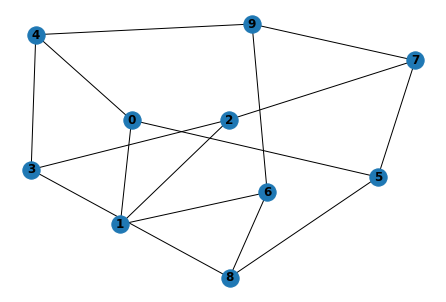

In [7]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
nx.draw(G, with_labels=True, font_weight='bold')